In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch as th

In [10]:
runs = [
    {'name': 'personal', 'file': 'repro/train/rewards_individual__architecture_individual__lr_0.0001'},
    {'name': 'shared', 'file': 'repro/train/rewards_individual__architecture_shared__lr_0.0001'},
    {'name': 'global', 'file': 'repro/train/rewards_individual__architecture_central__lr_0.0001'},
    {'name': 'random', 'file': 'repro/train/rewards_individual__architecture_random__lr_0.0001'},
]


file = '../runs/{}/train/env/eval/1000.pt'

tensors = {
    r['name']: th.load(file.format(r['file']), map_location=th.device('cpu'))
    for r in runs
}

In [11]:
ci_actions = {k: v['actions'][:,:,:,1].numpy() for k,v in tensors.items()}

## Colors used by individual agents

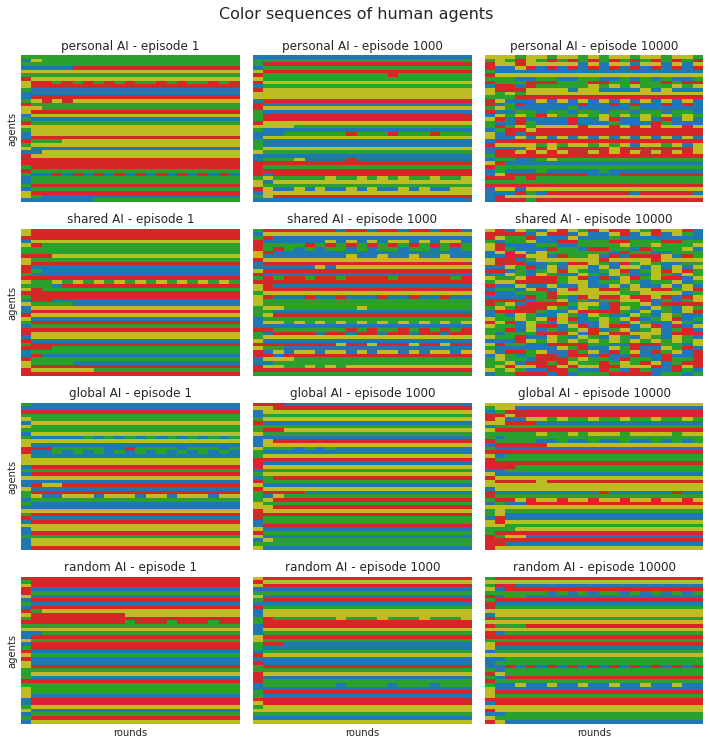

In [14]:
episodes = [1, 1000, 10000]
idx = [0, 99, 999]
sns.set_style("white")
colors = sns.color_palette("tab10")

fig, axes = plt.subplots(len(runs), len(episodes), figsize=(10,10))
for  j, ((name, ci_actions_), axes_) in enumerate(zip(ci_actions.items(), axes)):
    for e, i, ax in zip(episodes, idx, axes_): 
        g = sns.heatmap(ci_actions_[i].T, cmap=[colors[0],colors[8],colors[2],colors[3]], cbar=False, ax=ax, yticklabels=False, xticklabels=False)
        if i == 0:
            g.set_ylabel('agents')
        if j == (len(runs) - 1):
            g.set_xlabel('rounds')
        g.set_title(f'{name} AI - episode {e}')
suptitle = plt.suptitle('Color sequences of human agents', y=1.03, fontsize=16)
plt.tight_layout()

plt.savefig('plots/color_sequences.svg', bbox_extra_artists=(suptitle,), bbox_inches="tight")